<a href="https://colab.research.google.com/github/JavierPachas/tf_examples/blob/main/tf_02_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Detecting features in images**

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
import numpy as np
from tensorflow.keras import  Sequential
from tensorflow.keras.layers import Dense

In [3]:
data = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = data.load_data()

training_images = training_images.reshape(60000, 28,28,1)
training_images = training_images/ 255.0
test_images = test_images.reshape(10000, 28,28,1)
test_images = test_images/ 255.0

model = tf.keras.models.Sequential([
    #convolutional layer used as input layer. We want the layer to learn 64 convolutions of 3x3 filters
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu',
                       input_shape = (28, 28, 1)),
    #Pooling layer
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs = 50)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])


4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/50
1875/1875 [==============================] - 94s 49ms/step - loss: 0.4443 - accuracy: 0.8380
Epoch 2/50
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2919 - accuracy: 0.8928
Epoch 3/50
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2476 - accuracy: 0.9085
Epoch 4/50
1875/1875 [==============================] - 83s 44ms/step - loss: 0.2163 - accuracy: 0.9200
Epoch 5/50
1875/1875 [==============================] - 81s 43ms/step - loss: 0.1898 - accuracy: 0.9284
Epoch 6/50
1875/1875 [==============================] - 83s 44ms/step - loss: 0.1658 - accuracy: 0.9371
Epoch 7/50
1875/1875 [==============================] - 81s 43ms/step - loss: 0.1460 - accuracy: 0.9449
Epoch 8/50
1875/1875 [==============================] - 81s 43ms/step - loss: 0.1296 - accuracy: 0.9506
Epoch 9/50
1875/1875 [==============================] - 82s 44ms/step - loss: 0.1132 - accuracy: 0.9573
E

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

##**CNN to distinguish between images of horses and humans**

Over a thousand computer-generated 300 x 300 images of horses and humans.

In [7]:
import urllib.request
import zipfile

url = 'https://storage.googleapis.com/learning-datasets/horse-or-human.zip'

file_name = 'horse-or-human.zip'
training_dir = 'horse-or-human/training/'
urllib.request.urlretrieve(url, file_name)

zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#rescaling 1/255
train_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = (300, 300),
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu',
                           input_shape = (300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 149, 149, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 35, 35, 64)       

In [12]:
#!pip install pillow
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy',
              optimizer =  RMSprop(lr = 0.001),
              metrics = ['accuracy'])
history = model.fit_generator(
    train_generator,
    epochs = 15
)

<ipython-input-12-278e96118fdc>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
33/33 [==============================] - 103s 3s/step - loss: 0.6969 - accuracy: 0.6115
Epoch 2/15
33/33 [==============================] - 99s 3s/step - loss: 0.4340 - accuracy: 0.8267
Epoch 3/15
33/33 [==============================] - 98s 3s/step - loss: 0.2542 - accuracy: 0.9114
Epoch 4/15
33/33 [==============================] - 99s 3s/step - loss: 0.1962 - accuracy: 0.9406
Epoch 5/15
33/33 [==============================] - 99s 3s/step - loss: 0.0912 - accuracy: 0.9659
Epoch 6/15
33/33 [==============================] - 100s 3s/step - loss: 0.1441 - accuracy: 0.9620
Epoch 7/15
33/33 [==============================] - 105s 3s/step - loss: 0.1771 - accuracy: 0.9649
Epoch 8/15
33/33 [==============================] - 104s 3s/step - loss: 0.0509 - accuracy: 0.9825
Epoch 9/15
33/33 [==============================] - 122s 4s/step - loss: 0.0886 - accuracy: 0.9737
Epoch 10/15
33/33 [==============================] - 120s 4s/step - loss: 0.0013 - accuracy: 1.0000
Epoch 11/15
3

###**Adding validation**

In [13]:
validation_url = 'https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip'

validation_file_name = 'validation-horse-or-human.zip'
validation_dir = 'horse-or-human/validation/'
urllib.request.urlretrieve(validation_url, validation_file_name)

zip_ref = zipfile.ZipFile(validation_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()

In [14]:
validation_datagen = ImageDataGenerator(rescale = 1/255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (300, 300),
    class_mode = 'binary'
)

Found 256 images belonging to 2 classes.


In [16]:
history = model.fit_generator(
    train_generator,
    epochs = 15,
    validation_data = validation_generator
)

<ipython-input-16-1ddcba7086ea>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
33/33 [==============================] - 110s 3s/step - loss: 8.6835e-04 - accuracy: 1.0000 - val_loss: 2.3371 - val_accuracy: 0.8672
Epoch 2/15
33/33 [==============================] - 109s 3s/step - loss: 1.1028e-04 - accuracy: 1.0000 - val_loss: 4.5181 - val_accuracy: 0.8477
Epoch 3/15
33/33 [==============================] - 108s 3s/step - loss: 0.0498 - accuracy: 0.9834 - val_loss: 2.3586 - val_accuracy: 0.8633
Epoch 4/15
33/33 [==============================] - 109s 3s/step - loss: 1.1702e-04 - accuracy: 1.0000 - val_loss: 2.6810 - val_accuracy: 0.8633
Epoch 5/15
33/33 [==============================] - 106s 3s/step - loss: 6.5729e-05 - accuracy: 1.0000 - val_loss: 2.9579 - val_accuracy: 0.8633
Epoch 6/15
33/33 [==============================] - 109s 3s/step - loss: 1.4527e-05 - accuracy: 1.0000 - val_loss: 3.5193 - val_accuracy: 0.8633
Epoch 7/15
33/33 [==============================] - 108s 3s/step - loss: 8.3681e-06 - accuracy: 1.0000 - val_loss: 3.5721 - val_accura

###**Testing the model**

Saving horse-6276602_640.jpg to horse-6276602_640.jpg
Saving man-4672229_640.jpg to man-4672229_640 (5).jpg
Saving woman-1274056_640.jpg to woman-1274056_640 (5).jpg
Saving man-2920911_640.jpg to man-2920911_640 (5).jpg
Saving woman-3083453_640.jpg to woman-3083453_640 (5).jpg
Saving horse-4720178_640.jpg to horse-4720178_640 (5).jpg


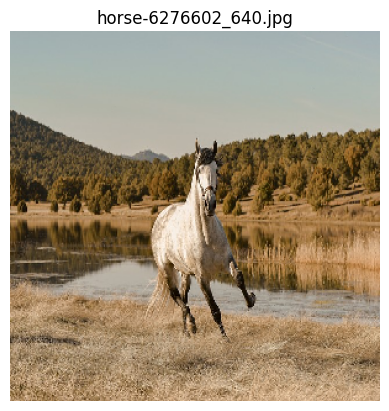

1/1 [==============================] - 0s 44ms/step
[[0.]]
[0.]
horse-6276602_640.jpg is a horse


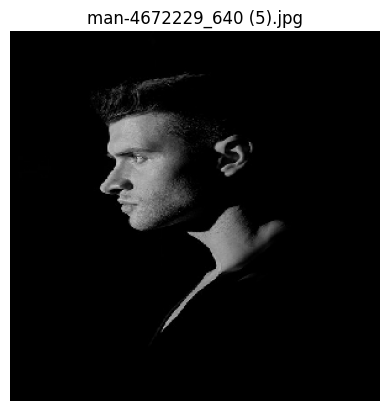

1/1 [==============================] - 0s 42ms/step
[[1.]]
[1.]
man-4672229_640 (5).jpg is a human


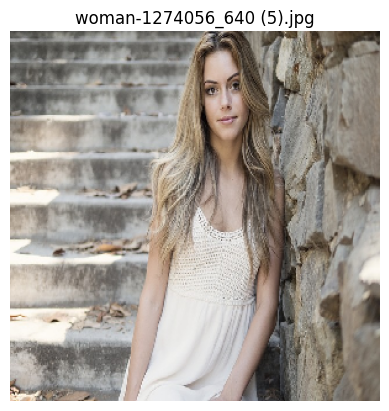

1/1 [==============================] - 0s 44ms/step
[[1.]]
[1.]
woman-1274056_640 (5).jpg is a human


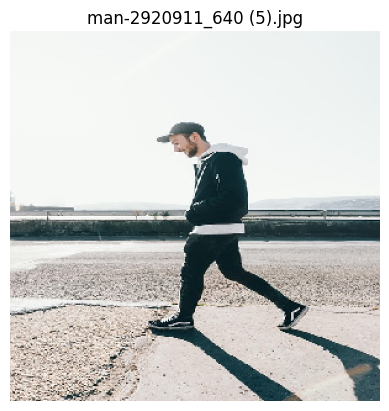

1/1 [==============================] - 0s 62ms/step
[[1.]]
[1.]
man-2920911_640 (5).jpg is a human


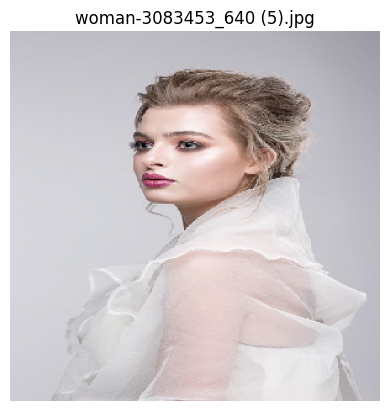

1/1 [==============================] - 0s 42ms/step
[[1.]]
[1.]
woman-3083453_640 (5).jpg is a human


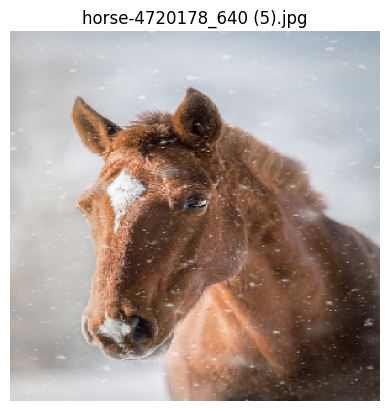

1/1 [==============================] - 0s 45ms/step
[[0.]]
[0.]
horse-4720178_640 (5).jpg is a horse


In [22]:
#pixabay.com
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for f in uploaded.keys():
  #predicting images
  path = '/content/' + f
  img = image.load_img(path, target_size = (300, 300))#resize the files to 300x300

  #code to plot each test image
  plt.imshow(img)
  plt.title(f)
  plt.axis('off')
  plt.show()

  #image to array
  x = image.img_to_array(img) #2D
  x = np.expand_dims(x, axis = 0) #adding an extra dimension as needed for input

  image_tensor = np.vstack([x]) #vertical stacking
  classes = model.predict(image_tensor)
  print(classes)
  print(classes[0])

  if classes[0] > 0.5:
    print(f + ' is a human')
  else:
    print(f + ' is a horse')